<h1>Question:</h1>
<p>How does your major, college, and region affect your graduation salary, and your mid-career salary?</p>

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#Add a Markdown stating we are reading in our csv dataset files into a pandas dataframe

In [3]:
#changed path to this because this is what is need to run it off of github
#you can uncomment ur path when you are running this code on ur machine

# path = 'C:\\Users\\kalra\\Documents\\NJIT\\Junior\\Fall 2020\\CS 301\\Group Project\\'
path = "Kaggle Data Sets/"      
deg_df = pd.read_csv(path + 'degrees-that-pay-back.csv', index_col = 0)
salc_df = pd.read_csv(path + 'salaries-by-college-type.csv', index_col = 0)
salr_df = pd.read_csv(path + 'salaries-by-region.csv', index_col = 0)

In [ ]:
#Add a markdown stating that we are picking and choosing only the columns we are interested in collecting from Degrees That Pay Back Data Set

In [4]:
#This data set contains all the data we need to answer about how your major effects your starting salary and mid career salary
major_salary = deg_df[["Starting Median Salary", "Mid-Career Median Salary"]]
major_salary.head()

,Starting Median Salary,Mid-Career Median Salary
Undergraduate Major,,
Accounting,"$46,000.00","$77,100.00"
Aerospace Engineering,"$57,700.00","$101,000.00"
Agriculture,"$42,600.00","$71,900.00"
Anthropology,"$36,800.00","$61,500.00"
Architecture,"$41,600.00","$76,800.00"


In [ ]:
#Add a markdown stating that we are merging the other two data sets together and then choosing only the columns that we need to answer our question

In [21]:
#This cell merges the salary by college and region data set into one data set with no duplicate columns
merged_data = pd.merge(salr_df, salc_df, on="School Name", how = "right", suffixes = ('', '_y'))
merged_data.drop(merged_data.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
merged_data.sort_values(by="School Name", ascending = True)
college_region = merged_data[["School Type", "Region", "Starting Median Salary", "Mid-Career Median Salary"]].sort_values(by="School Name", ascending = True)
college_region.head()

,School Type,Region,Starting Median Salary,Mid-Career Median Salary
School Name,,,,
Amherst College,Liberal Arts,Northeastern,"$54,500.00","$107,000.00"
Appalachian State University,State,Southern,"$40,400.00","$69,100.00"
Arizona State University (ASU),State,Western,"$47,400.00","$84,100.00"
Arizona State University (ASU),Party,Western,"$47,400.00","$84,100.00"
Arkansas State University (ASU),State,Southern,"$38,700.00","$63,300.00"


In [ ]:
#Add a markdown showing that this section of this program is all about the dataframe: major_salary
#state that we are formatting the data from string format to float format for easier manipulation in the future

In [13]:
for index,row in major_salary.iterrows():
    val1 = row['Starting Median Salary']
    val1_rep = val1.replace(',', '').replace('$', '')
    row['Starting Median Salary'] = val1_rep

    val2 = row['Mid-Career Median Salary']
    val2_rep = val2.replace(',', '').replace('$', '')
    row['Mid-Career Median Salary'] = val2_rep

In [ ]:
#Check for any Not a Number value in the column: Starting Median Salary and replace those with the median values of the column and print out the new data frame, if no NaN exists, then just print out the original dataframe

In [17]:
nanValues1 = major_salary.loc[(major_salary['Starting Median Salary'].isna())]
if len(nanValues1) != 0:
    temp = major_salary['Starting Median Salary'].astype(float)
    filledSet1 = temp.fillna(temp.median(skipna = True))
    print("NaN values have been filled in: \n", filledSet1.head())
else:
    print(major_salary.head())

                      Starting Median Salary Mid-Career Median Salary
Undergraduate Major                                                  
Accounting                          46000.00                 77100.00
Aerospace Engineering               57700.00                101000.00
Agriculture                         42600.00                 71900.00
Anthropology                        36800.00                 61500.00
Architecture                        41600.00                 76800.00


In [ ]:
#Check for any Not a Number value in the column: Mid-Career Median Salary and replace those with the median values of the column and print out the new data frame, if no NaN exists, then just print out the original dataframe

In [18]:
nanValues1 = major_salary.loc[(major_salary['Mid-Career Median Salary'].isna())]
if len(nanValues1) != 0:
    temp = major_salary['Mid-Career Median Salary'].astype(float)
    filledSet1 = temp.fillna(temp.median(skipna = True))
    print("NaN values have been filled in: \n", filledSet1.head())
else:
    print(major_salary.head())

                      Starting Median Salary Mid-Career Median Salary
Undergraduate Major                                                  
Accounting                          46000.00                 77100.00
Aerospace Engineering               57700.00                101000.00
Agriculture                         42600.00                 71900.00
Anthropology                        36800.00                 61500.00
Architecture                        41600.00                 76800.00


In [ ]:
#Create a Box Plot to visualize the spread of the data from the columns: Starting Median Salary and Mid-Career Median Salary

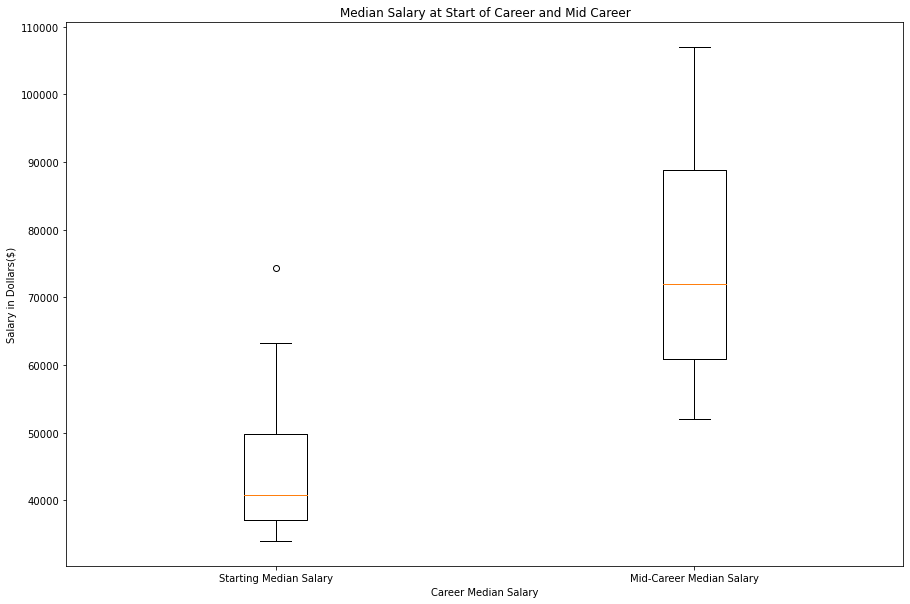

In [19]:
start_career = major_salary['Starting Median Salary'].astype(float)
mid_career = major_salary['Mid-Career Median Salary'].astype(float)
# print(type(start_career))
# print(type(mid_career))

plt.figure(figsize=(15,10))
plt.boxplot([start_career, mid_career])
plt.xticks([1, 2], ['Starting Median Salary', 'Mid-Career Median Salary'])
plt.xlabel("Career Median Salary")
plt.ylabel("Salary in Dollars($)")
plt.title("Median Salary at Start of Career and Mid Career")
plt.show()

In [ ]:
#Check for any and all outliers for the column: Starting Median Salary in major_salary

In [16]:
#Get any and all outliers for column Starting Median Salary in major_salary
iqr = start_career.quantile(0.75) - start_career.quantile(0.25)
min = start_career.quantile(0.25) - (1.5 * iqr)
max = start_career.quantile(0.75) + (1.5 * iqr)

min_df = major_salary.loc[major_salary['Starting Median Salary'].astype(float) < min]
max_df = major_salary.loc[major_salary['Starting Median Salary'].astype(float) > max]
outliers = pd.concat([min_df, max_df])
if(len(outliers) == 0):
    print("No outliers in column: Mid-Career Median Salary")
else:
    print(outliers.head())

                    Starting Median Salary Mid-Career Median Salary
Undergraduate Major                                                
Physician Assistant               74300.00                 91700.00


In [ ]:
#Check for any and all outliers for the column: Mid-Career Median Salary in major_salary

In [18]:
#Get any and all outliers for column Mid-Career Median Salary in major_salary
iqr = mid_career.quantile(0.75) - start_career.quantile(0.25)
min = mid_career.quantile(0.25) - (1.5 * iqr)
max = mid_career.quantile(0.75) + (1.5 * iqr)

min_df = major_salary.loc[major_salary['Mid-Career Median Salary'].astype(float) < min]
max_df = major_salary.loc[major_salary['Mid-Career Median Salary'].astype(float) > max]
outliers = pd.concat([min_df, max_df])
if(len(outliers) == 0):
    print("No outliers in column: Mid-Career Median Salary")
else:
    print(outliers.head())

No outliers in column: Mid-Career Median Salary


In [22]:
#Create a bar graph comparing starting and mid-career median salary of each major that is listed

In [23]:
#Code for bar graph goes here

In [24]:
#Add a markdown stating that from here on will be all about the data frame: college_region
#Check for any and all NaN rows and print it out

In [ ]:
#To find which rows have NaN values
college_region.loc[(college_region['Starting Median Salary'].isna())]

In [25]:
#state that we are formatting the data from string format to float format for easier manipulation in the future

In [ ]:
for y, x in college_region.iterrows():
    stSal = str(x['Starting Median Salary'])
    stSal_fin = stSal.replace('$', '').replace(',', '')
    x['Starting Median Salary'] = stSal_fin

    mdSal = str(x['Mid-Career Median Salary'])
    mdSal_fin = mdSal.replace('$', '').replace(',', '')
    x['Mid-Career Median Salary'] = mdSal_fin
    # print(x['Starting Median Salary'], x['Mid-Career Median Salary'])

In [26]:
#Replace any and all NaN Values with the median values for the salaray related categories

In [ ]:
stcr = college_region['Starting Median Salary'].astype(float)
col_df1 = stcr.fillna(stcr.median(skipna = True)).astype(float)
# print(col_df.head())

mdcr = college_region['Mid-Career Median Salary'].astype(float)
col_df2 = mdcr.fillna(mdcr.median(skipna = True)).astype(float)

In [ ]:
#Create a box plot to visualize the spread of data

In [ ]:
plt.figure(figsize = (15,10))
plt.boxplot([col_df1, col_df2])
plt.xticks([1, 2], ['Starting Median Salary', 'Mid-Career Median Salary'])
plt.xlabel("Career Median Salary")
plt.ylabel("Salary in Dollars ($)")
plt.title("Median Salary at Start of Career and Mid Career by Colleges and Regions")
plt.show()

In [ ]:
#Check for any and all outliers for the column: Starting Median Salary in major_salary

In [ ]:
#Code goes here

In [ ]:
#Check for any and all outliers for the column: Mid-Career Median Salary in major_salary

In [ ]:
#Code goes here

In [ ]:
#Check for NaN in the categorical column: region, and fill any NaN values with the mode value in the column

In [ ]:
#Code goes here

In [27]:
#Visualize the frequency of colleges in each region

In [ ]:
#Code goes here